In [1]:
#Load the data
watchData <- read.csv(unz("activity.zip", "activity.csv"),na.strings="NA", sep=",", head=TRUE) 


In [2]:
#Not consider null NA values

watchData <-na.omit(watchData)

In [3]:
watchData$date <-  as.Date(watchData$date, "%Y-%m-%d") # change text Date to proper date 


In [4]:
stepsEachDay<-aggregate(watchData$steps, na.rm=TRUE, 
          FUN = sum,by = list(eachday = watchData$date))

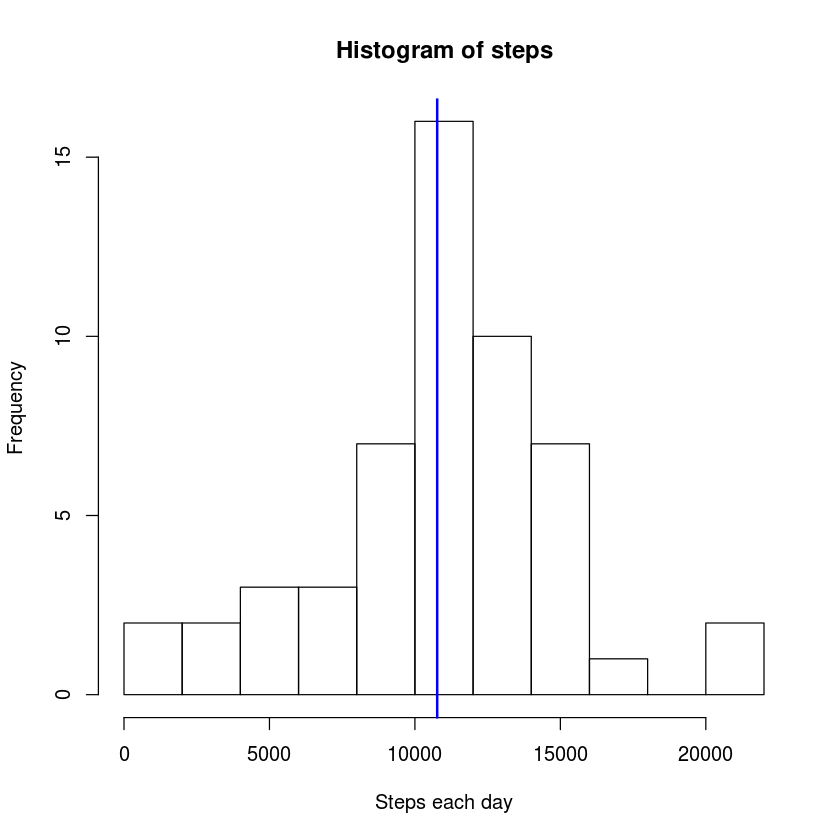

In [31]:
hist(stepsEachDay$x, breaks=10, xlab ="Steps each day",main="Histogram of steps")
abline(v = mean(stepsEachDay$x, na.rm=TRUE) , col = "blue", lwd = 2)


In [6]:

mean(stepsEachDay$x, na.rm=TRUE)

median(stepsEachDay$x, na.rm=TRUE)

[1] 10766.19

[1] 10765

In [7]:
library(ggplot2)

In [14]:
avgactivity <- aggregate(steps~interval ,watchData,mean,na.rm = TRUE)

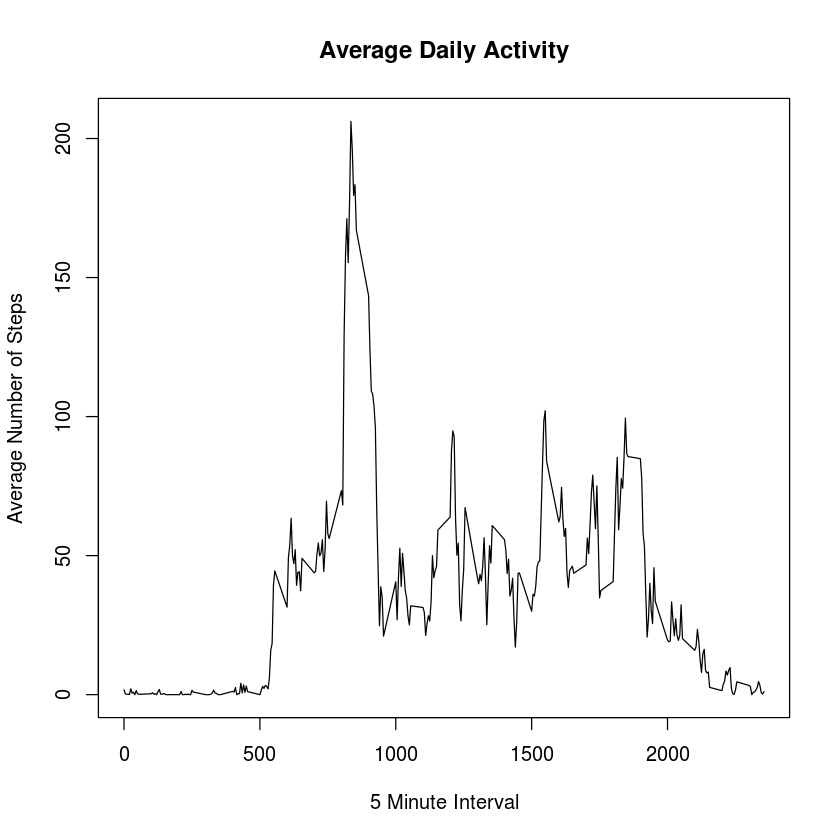

In [15]:
plot(x = avgactivity$interval,y = avgactivity$steps,type = "l",
     xlab = "5 Minute Interval", ylab = "Average Number of Steps",
     main = "Average Daily Activity")


In [10]:
avgactivity[avgactivity$steps==max(avgactivity$steps),]$interval

[1] 835

In [11]:
head(avgactivity)

interval,steps
0,1.7169811
5,0.3396226
10,0.1320755
15,0.1509434
20,0.0754717
25,2.0943396


In [16]:
#have to read again since we did not consider NA values
watchData <- read.csv(unz("activity.zip", "activity.csv"), sep=",", head=TRUE) 
sum(is.na(watchData$steps))

[1] 2304

In [17]:
watchDataNotNA <-watchData

In [18]:
watchDataNotNA[is.na(watchDataNotNA$steps)] <-
avgactivity$steps[avgactivity$interval==intervalstochange]

ERROR: Error in eval(expr, envir, enclos): object 'intervalstochange' not found


In [19]:
watchDataNotNA[is.na(watchDataNotNA$steps) & watchDataNotNA$interval ==255,]
#watchDataNotNA[watchDataNotNA$interval ==255,]
avgactivity$steps[avgactivity$interval == 255]

,steps,date,interval
36,NA,2012-10-01,255
2052,NA,2012-10-08,255
8964,NA,2012-11-01,255
9828,NA,2012-11-04,255
11268,NA,2012-11-09,255
11556,NA,2012-11-10,255
12708,NA,2012-11-14,255
17316,NA,2012-11-30,255


[1] 0.9433962

In [20]:
sum(is.na(watchDataNotNA$steps))

[1] 2304

In [21]:
watchDataNA <- watchDataNotNA[is.na(watchDataNotNA$steps),]


In [22]:

for (row in 1:nrow(watchDataNA)) {
    
watchDataNA$steps[row]= 
    avgactivity$steps[avgactivity$interval == watchDataNA$interval[row]]
}

In [23]:
head(watchDataNA)

steps,date,interval
1.7169811,2012-10-01,0
0.3396226,2012-10-01,5
0.1320755,2012-10-01,10
0.1509434,2012-10-01,15
0.0754717,2012-10-01,20
2.0943396,2012-10-01,25


In [24]:
watchDataNotNA[is.na(watchDataNotNA$steps),]<-watchDataNA

In [ ]:
#apply(watchDataNotNA,2,function(x) 
 #  watchDataNotNA[is.na(watchDataNotNA$steps) & watchDataNotNA$interval ==x,1] 
  #  <<- avgactivity$steps[avgactivity$interval == x])

In [ ]:
watchDataNotNA[is.na(watchDataNotNA$steps)]

In [ ]:
sum(is.na(watchDataNotNA))

In [25]:
stepsEachDayNew<-aggregate(watchDataNotNA$steps, 
          FUN = sum,by = list(eachday = watchDataNotNA$date))

mean(stepsEachDayNew$x, na.rm=TRUE)

median(stepsEachDayNew$x, na.rm=TRUE)

[1] 10766.19

[1] 10766.19

In [ ]:
hist(stepsEachDayNew$x, breaks=10, xlab ="Steps each day", main="Histogram of steps")

In [ ]:
avgactivity$date <-  as.Date(avgactivity$date, "%Y-%m-%d") # change text Date to proper date 


In [27]:
 watchDataNotNA["weekday"] <- !"Saturday" == weekdays(as.Date(watchDataNotNA$date)) & !"Sunday" == weekdays(as.Date(watchDataNotNA$date))

In [28]:
avgactivity <- aggregate(steps~interval + weekday,watchDataNotNA,mean,na.rm = TRUE)

In [ ]:
head(avgactivity)

In [ ]:
library(datasets)
library(lattice)
f <- factor(avgactivity$weekday, labels = c("weekend", "week"))
xyplot(steps ~ interval | f, data = avgactivity, layout = c(1, 2), type="l")